In [31]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt


In [32]:
def get_features_cat_regression(df, target_col, columns=[], pvalue=0.05, with_individual_plot=False):
    significant_columns = []
    
    # Validaciones iniciales
    if target_col not in df.columns:
        print(f"La columna '{target_col}' no está presente en el DataFrame.")
        return None

    if not np.issubdtype(df[target_col].dtype, np.number):
        print(f"La columna '{target_col}' no es numérica continua.")
        return None

    if not columns:  # Si no se especifican columnas, selecciona categóricas por defecto
        columns = df.select_dtypes(exclude=[np.number]).columns.tolist()

    if not columns:
        print("No hay columnas categóricas en el DataFrame.")
        return None

    # Probar cada columna categórica
    for col in columns:
        unique_values = df[col].dropna().unique()
        if len(unique_values) < 2:
            continue  # Omitir columnas sin categorías válidas

        # Selección del test estadístico
        if len(unique_values) == 2:
            group1 = df[df[col] == unique_values[0]][target_col]
            group2 = df[df[col] == unique_values[1]][target_col]
            stat, p = ttest_ind(group1, group2, nan_policy='omit')
        else:
            groups = [df[df[col] == val][target_col] for val in unique_values]
            stat, p = f_oneway(*groups)

        # Verificar si el p-valor es significativo
        if p < pvalue:
            significant_columns.append(col)

            # Visualización opcional
            if with_individual_plot:
                plt.figure(figsize=(10, 6))
                sns.histplot(data=df, x=target_col, hue=col, multiple="stack", kde=True)
                plt.title(f"Histograma de {target_col} agrupado por {col}")
                plt.xlabel(target_col)
                plt.ylabel("Frecuencia")
                plt.show()

    # Retornar columnas significativas
    if not significant_columns:
        print("No se encontraron columnas categóricas significativas.")
        return None

    return significant_columns


In [33]:
df = pd.read_csv('titanic.csv')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


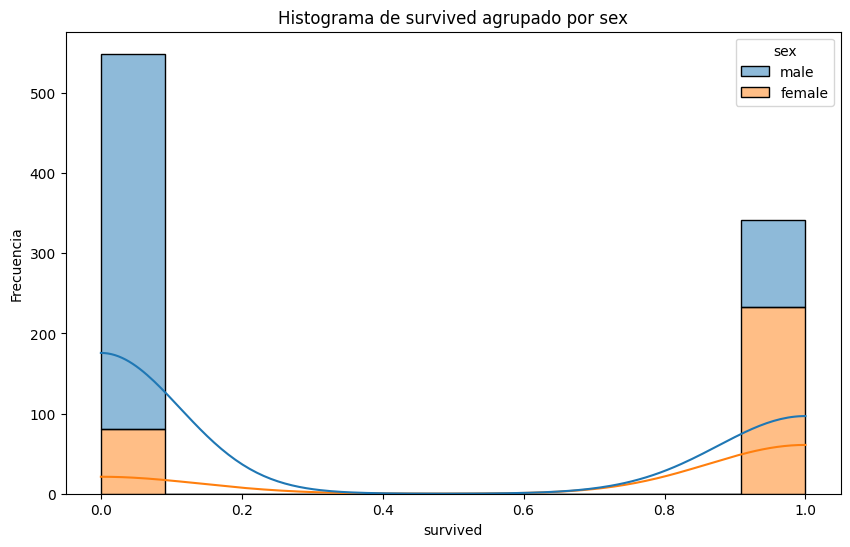

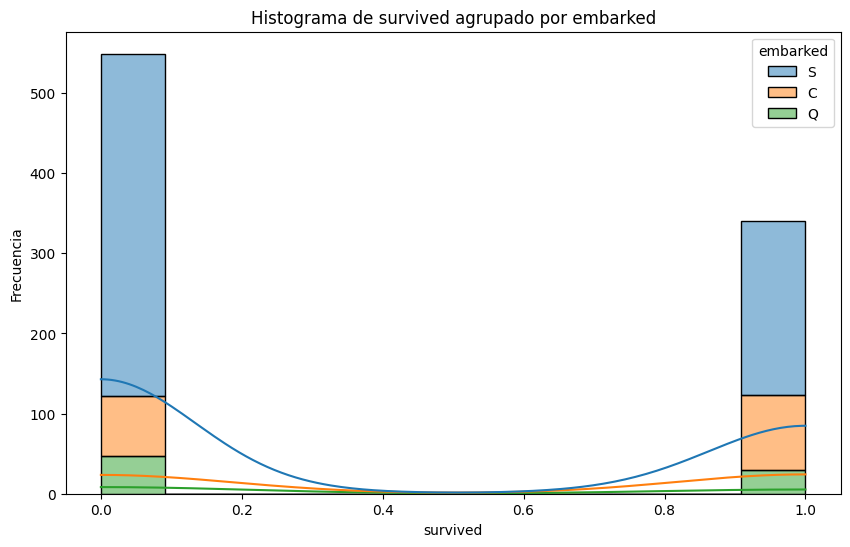

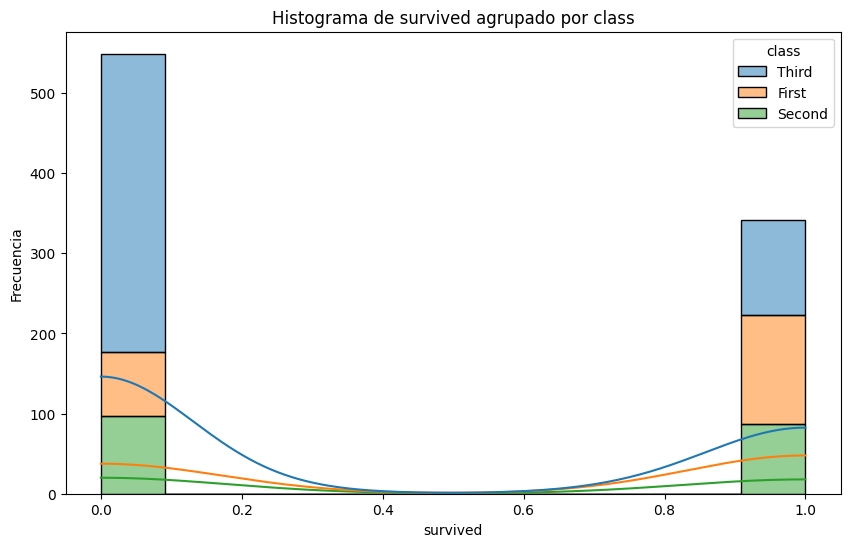

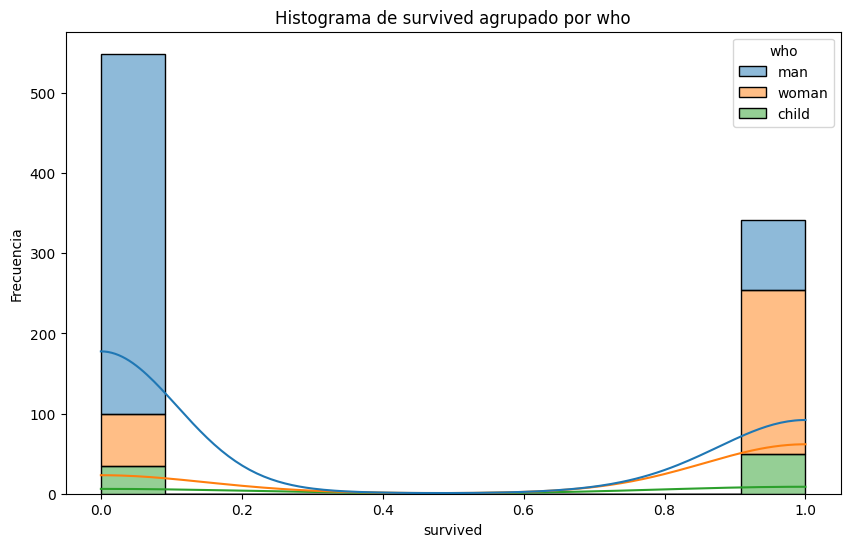

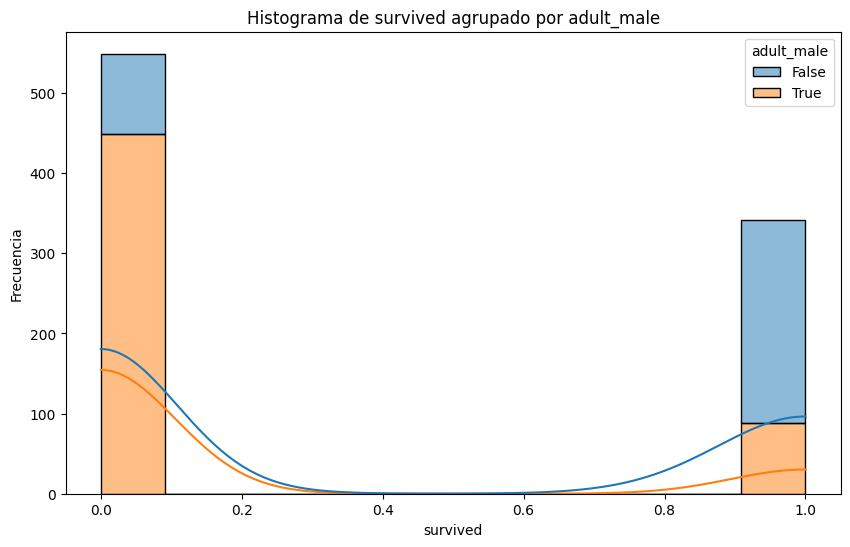

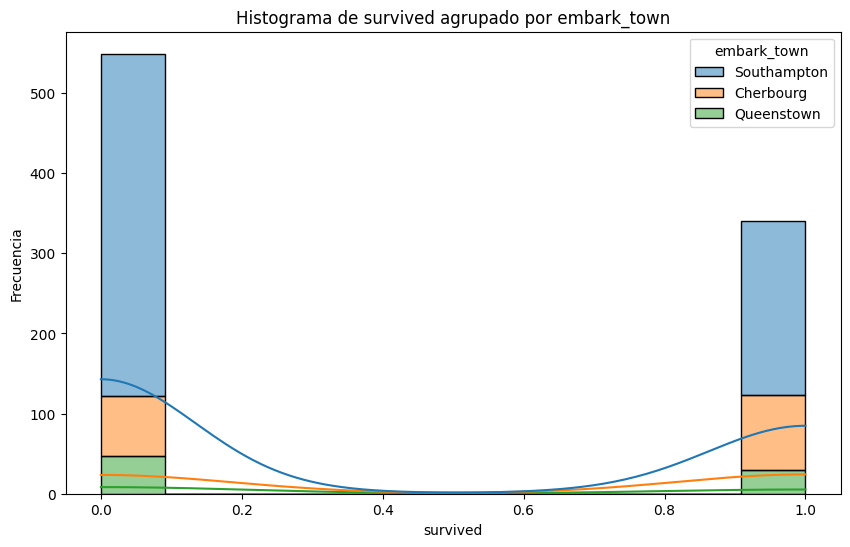

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


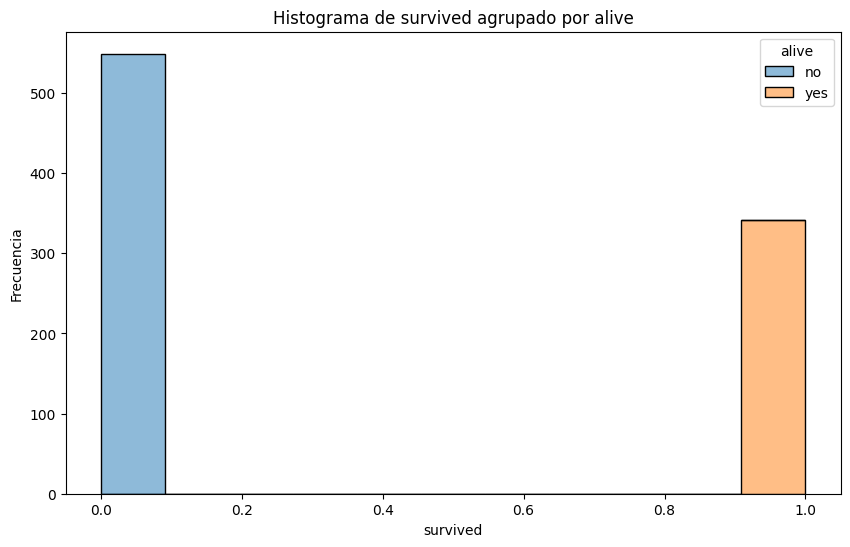

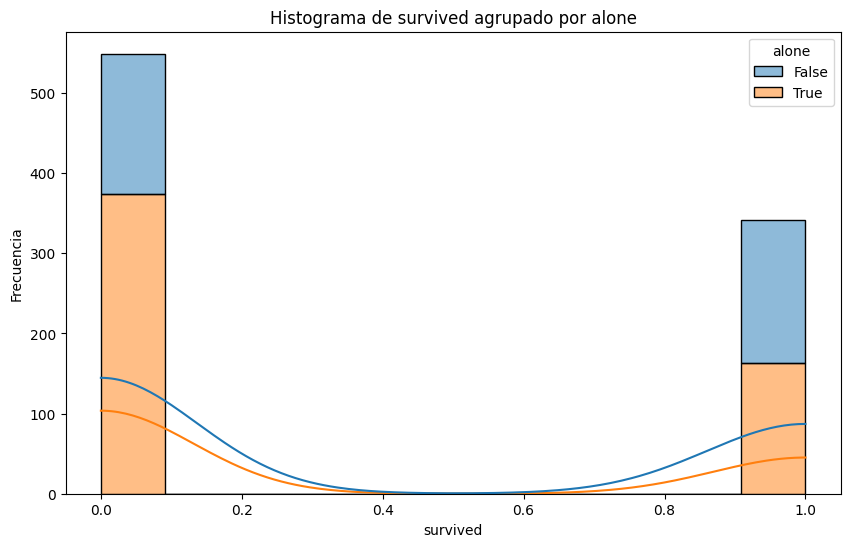

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'embark_town',
 'alive',
 'alone']

In [34]:
get_features_cat_regression(df, target_col='survived', pvalue=0.05, with_individual_plot=True)
